# 00 | EDA - Configuración General

1. Carga de librerías.

2. Seteo de estilos del notebook.

3. Ingesta del dataset.

In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'utils')))
import utils as ut

In [2]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
wines = pd.read_csv("../src/data/transformed/wines_transformed.csv")
wines.head(3)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,...,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,...,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,...,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,...,0,0,0,0,0,0,0,0,0,0


# 01 | Distribución de Datos Numéricos
- Esta sección se enfoca en analizar la distribución de variables numéricas para comprender valores habituales y atípicos, densidad de valores y estadísticas descriptivas generales.

## Rating
- ¿Cuales son los ratings más comunes?
- ¿El rating se relaciona con la cantidad de ratings?
- ¿El rating es un buen parámetro para la recomendación de vinos?
<br>
<br>
---

In [4]:
wines[["rating", "rating_qty"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,2026.0,4.012192,0.280431,2.9,3.90,4.0,4.2,4.8
rating_qty,1606.0,735.927148,1276.337340,25.0,107.25,277.0,769.0,18091.0


<Axes: xlabel='rating', ylabel='Count'>

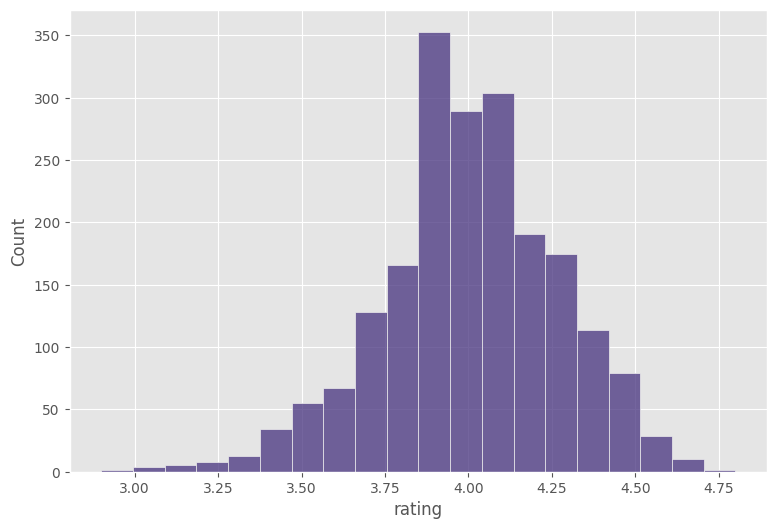

In [5]:
sns.histplot(wines, x="rating", bins=20)

<Axes: xlabel='rating_qty', ylabel='Count'>

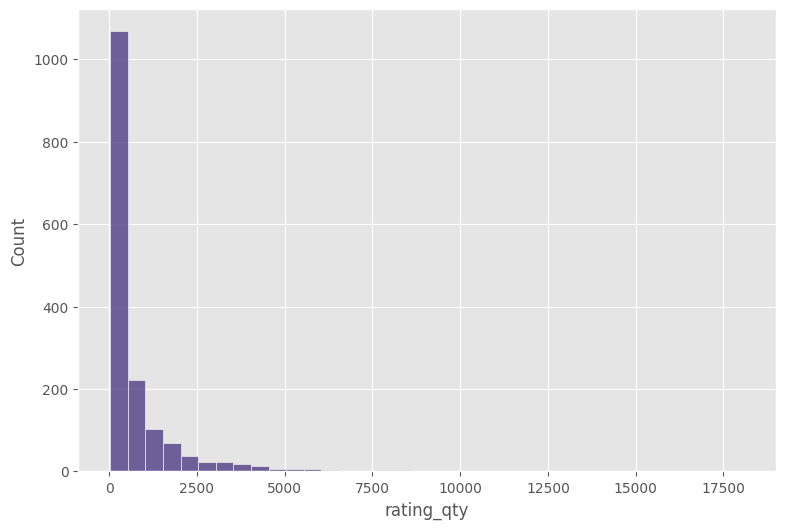

In [6]:
sns.histplot(wines, x="rating_qty", binwidth=500)

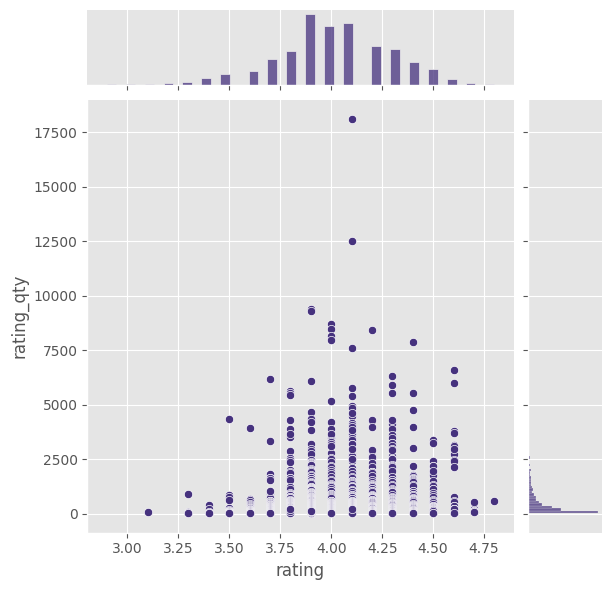

In [7]:
sns.jointplot(data=wines, x="rating", y="rating_qty")

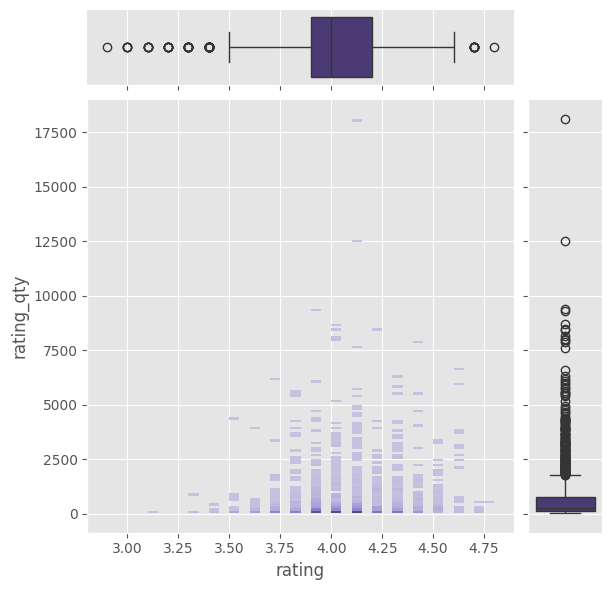

In [8]:
g = sns.JointGrid(data=wines, x="rating", y="rating_qty")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

<Axes: xlabel='rating_qty', ylabel='Count'>

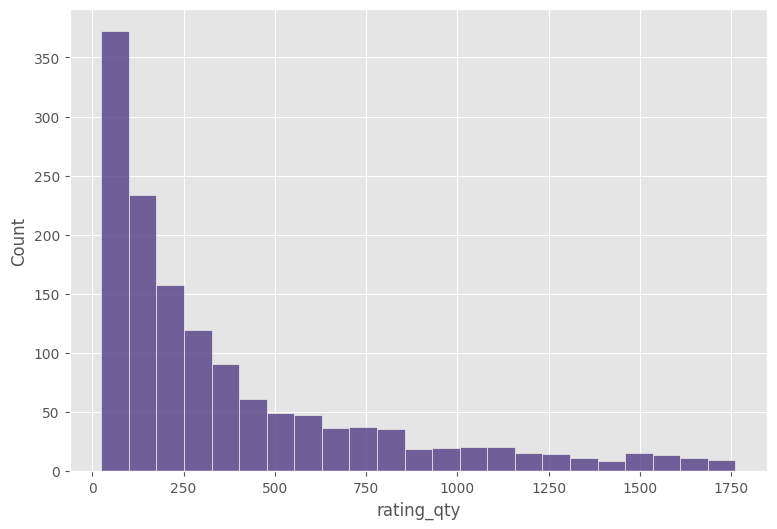

In [ ]:
no_outlier_rating = ut.manage_outlier_IQR(df=wines["rating_qty"], func="remove")
sns.histplot(no_outlier_rating)

## Price

- ¿Qué sería un vino caro y uno barato?
- ¿Nuestro dataset contiene muchos vinos caros o más baratos?
- ¿Los vinos más caros son mejores que los baratos?
- ¿Los existe algún equilibrio entre precio/calidad óptimo?
<br>
<br>
---

<Axes: xlabel='price', ylabel='Count'>

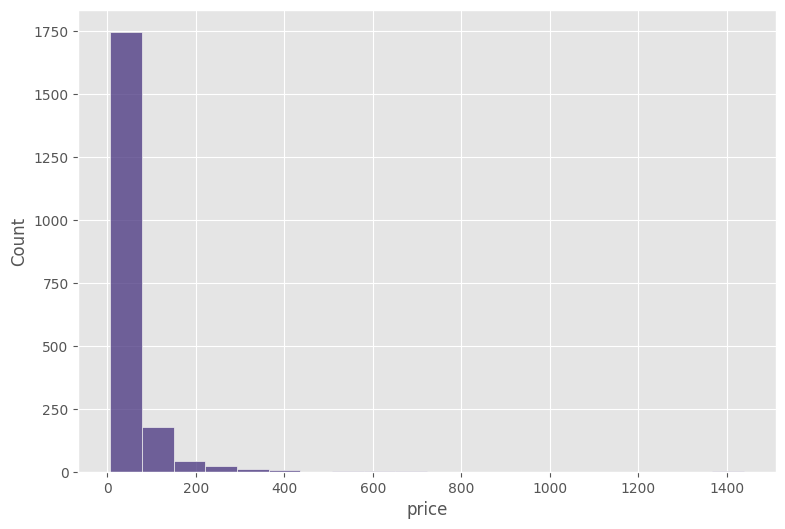

In [10]:
sns.histplot(wines, x="price", bins=20)